# <font size="5" color="black">Abschlussprojekt - Machine Learning </font>

<font size="2" color="black">Mario Klohn, Christos Terzoglou, Nesibe Elibol</font>

Gruppe E, 17.02.2022

## Introduction 
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attributes
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Daten stammen aus Kaggle: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

### Research question: 

Das Ziel unserer Untersuchung ist, ob man anhand von Syptomen klassifizieren kann ob jemand einen Schlaganfall (stroke) bekommt?

## Data collection

### Import moduls

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score,recall_score,make_scorer,f1_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [3]:
df = pd.read_csv(r"C:\Users\elibo\Desktop\machine\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.nunique() 

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

## 2. Datapreprocessing

In [6]:
#Removing column id 
df.drop('id',axis=1,inplace=True)

In [7]:
df.rename({'Residence_type': 'residence_type'}, axis=1, inplace=True)

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.age = df.age.astype(int)

4313/5109

In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
for i in df:
    if df[i].dtype == object:
        print(f"\n{df[i].name} \n{round(df[i].value_counts(normalize=True)*100,2)}")
#Gender: Other hat nur einen Eintrag, folgedessen wird entfernt


gender 
Female    58.59
Male      41.39
Other      0.02
Name: gender, dtype: float64

ever_married 
Yes    65.62
No     34.38
Name: ever_married, dtype: float64

work_type 
Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: work_type, dtype: float64

residence_type 
Urban    50.8
Rural    49.2
Name: residence_type, dtype: float64

smoking_status 
never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: smoking_status, dtype: float64


In [12]:
df.drop(df[df.gender =="Other"].index,  inplace=True) 

### Missing values 

In [13]:
# Fehlende Werte mit dem Median vom BMI ersetzt, Ausreißer
df['bmi'].fillna((df['bmi'].median()), inplace=True)

In [14]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.218634,0.097475,0.054022,106.140399,28.863300,0.048738
std,22.634799,0.296633,0.226084,45.285004,7.699785,0.215340
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:xlabel='bmi'>

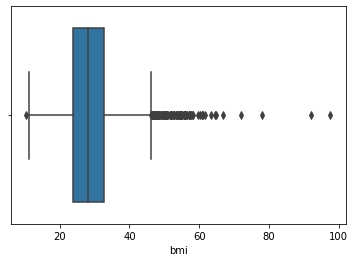

In [15]:
sns.boxplot(df.bmi)

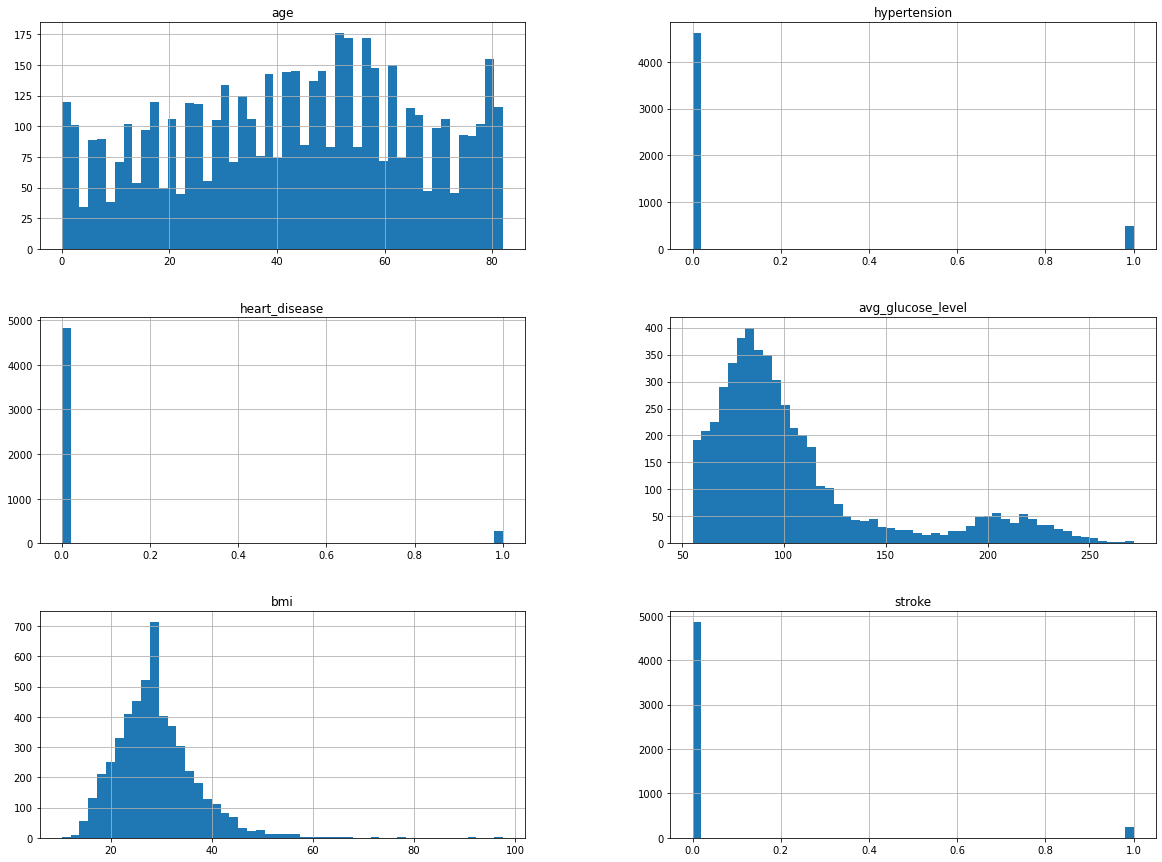

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

 BMI hat Ausreißer 

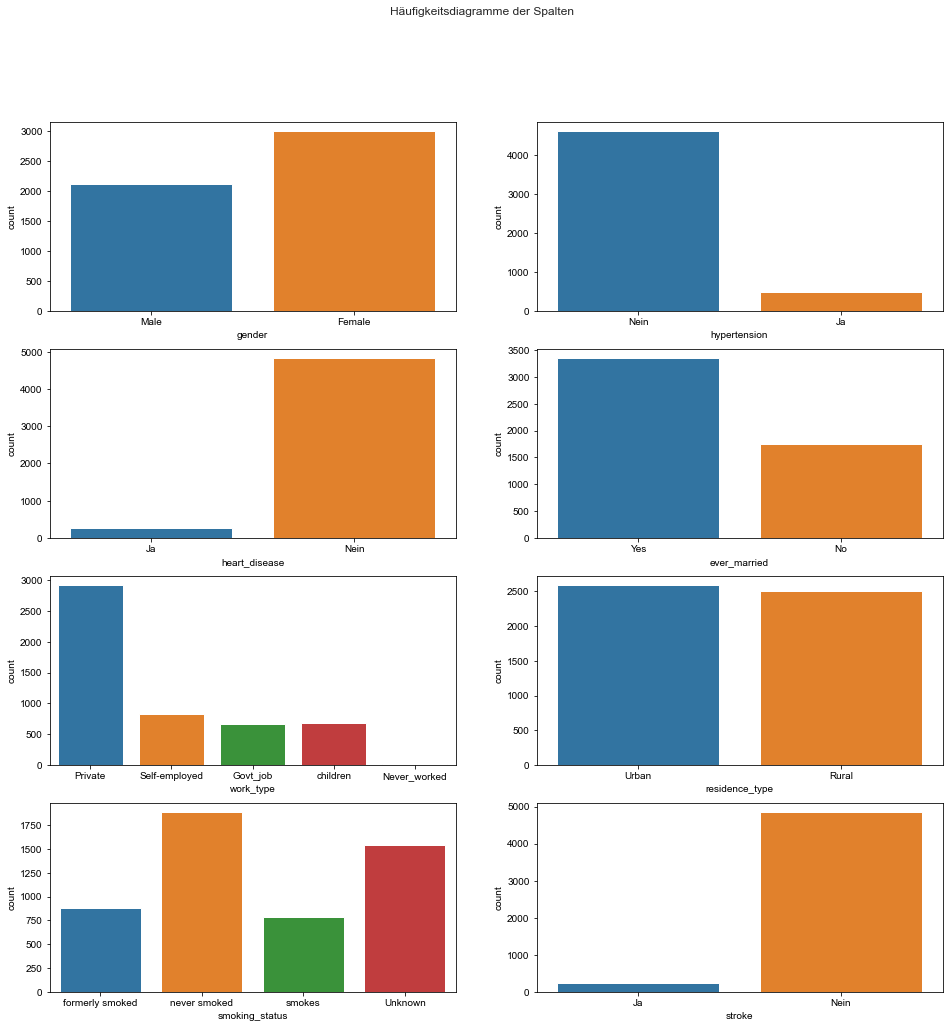

In [17]:
df1=df.copy()
df1.loc[df1.stroke == 0,"stroke"] = "Nein"
df1.loc[df1.stroke == 1,"stroke"] = "Ja"
df1.loc[df1.hypertension == 0,"hypertension"] = "Nein"
df1.loc[df1.hypertension == 1,"hypertension"] = "Ja"
df1.loc[df1.heart_disease == 0,"heart_disease"] = "Nein"
df1.loc[df1.heart_disease == 1,"heart_disease"] = "Ja"

fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Häufigkeitsdiagramme der Spalten")

sns.countplot(ax=axes[0,0],data=df1,x='gender')
sns.countplot(ax=axes[0,1],data=df1,x='hypertension')
sns.countplot(ax=axes[1,0],data=df1,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df1,x='ever_married')
sns.countplot(ax=axes[2,0],data=df1,x='work_type')
sns.countplot(ax=axes[2,1],data=df1,x='residence_type')
sns.countplot(ax=axes[3,0],data=df1,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df1,x='stroke')

plt.show()

Kinder unter 17 Jahren werden aus dem Datensatz entfernt. 

### Removing data

In [18]:
#Datensatz mit Kindern
len(df)

df["children_data"] = np.where(df.age<= 16, True, False)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,children_data
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,False
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False


In [19]:
df["children_data"].value_counts(normalize = True)*100

False    84.419652
True     15.580348
Name: children_data, dtype: float64

Text(0.5, 1.0, 'Anteil der Kinderdaten am gesamten Datensatz')

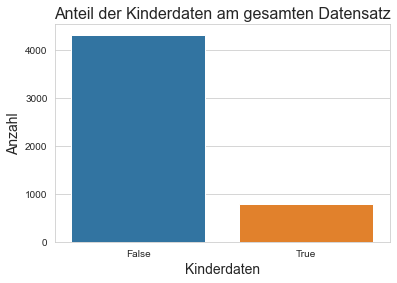

In [20]:
ax=sns.countplot("children_data",data=df)
ax.set_xlabel("Kinderdaten",fontsize=14)
ax.set_ylabel("Anzahl",fontsize=14)
plt.title("Anteil der Kinderdaten am gesamten Datensatz",size=16)

Wir entfernen 15,58% der Daten.

In [21]:
df.drop(columns=["children_data"],inplace=True) 

In [22]:
df=df.drop(df[df.age <=16].index)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
#Datensatz ohne Kinder
len(df)

4313

## Visualization

### Countplots of all columns

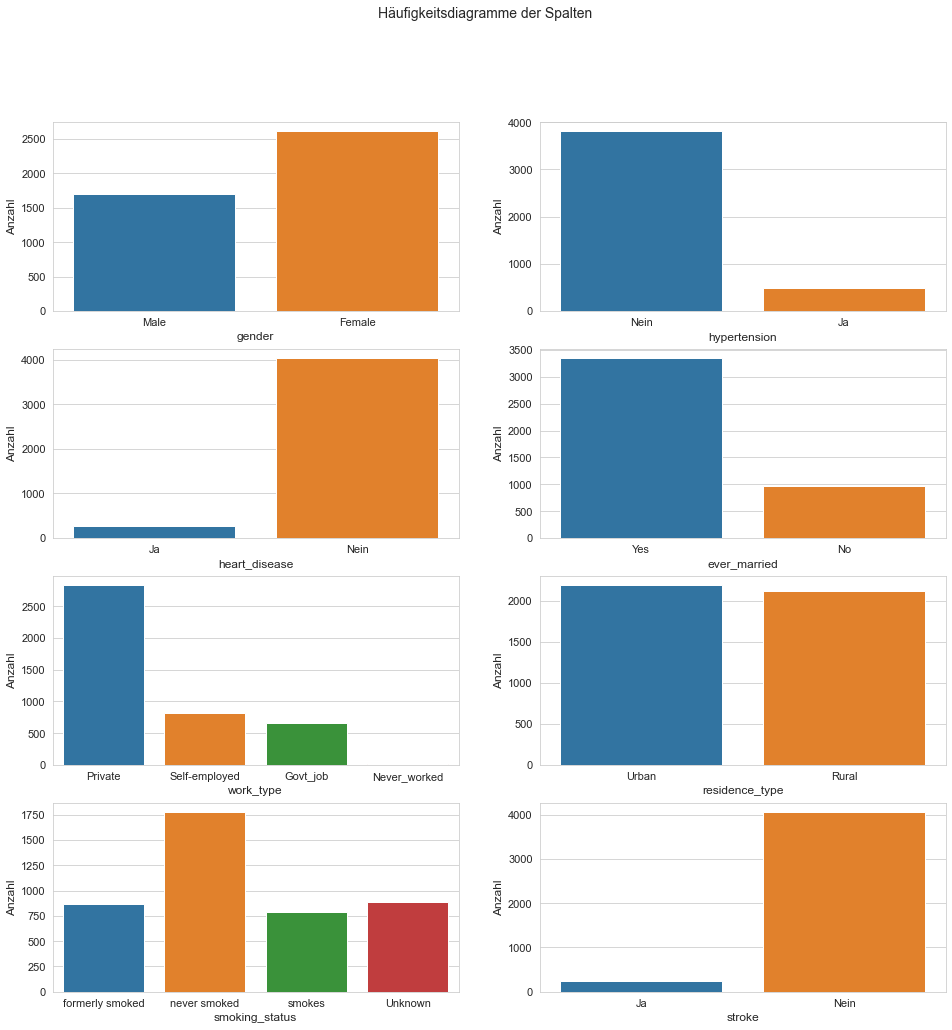

In [24]:
df1=df.copy()
df1.loc[df1.stroke == 0,"stroke"] = "Nein"
df1.loc[df1.stroke == 1,"stroke"] = "Ja"
df1.loc[df1.hypertension == 0,"hypertension"] = "Nein"
df1.loc[df1.hypertension == 1,"hypertension"] = "Ja"
df1.loc[df1.heart_disease == 0,"heart_disease"] = "Nein"
df1.loc[df1.heart_disease == 1,"heart_disease"] = "Ja"

df_st=['gender','hypertension','heart_disease','ever_married','work_type','residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(16,16))
fig.suptitle("Häufigkeitsdiagramme der Spalten",size=14)
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    g=sns.countplot(x=col_name, data=df1, ax=axs[i])
    g.set_xlabel(col_name,fontsize=12)
    g.set_ylabel("Anzahl",fontsize=12)
    g.tick_params(labelsize=11)

In [25]:
proportions = df["stroke"].value_counts(normalize = True)*100
proportions

0    94.273128
1     5.726872
Name: stroke, dtype: float64

Es gibt zu wenige Patientendaten bei den Spalten Stroke, Hypertension, Heart_disease. Nur knapp 6% der Teilnehmer haben einen Schlaganfall erlitten.

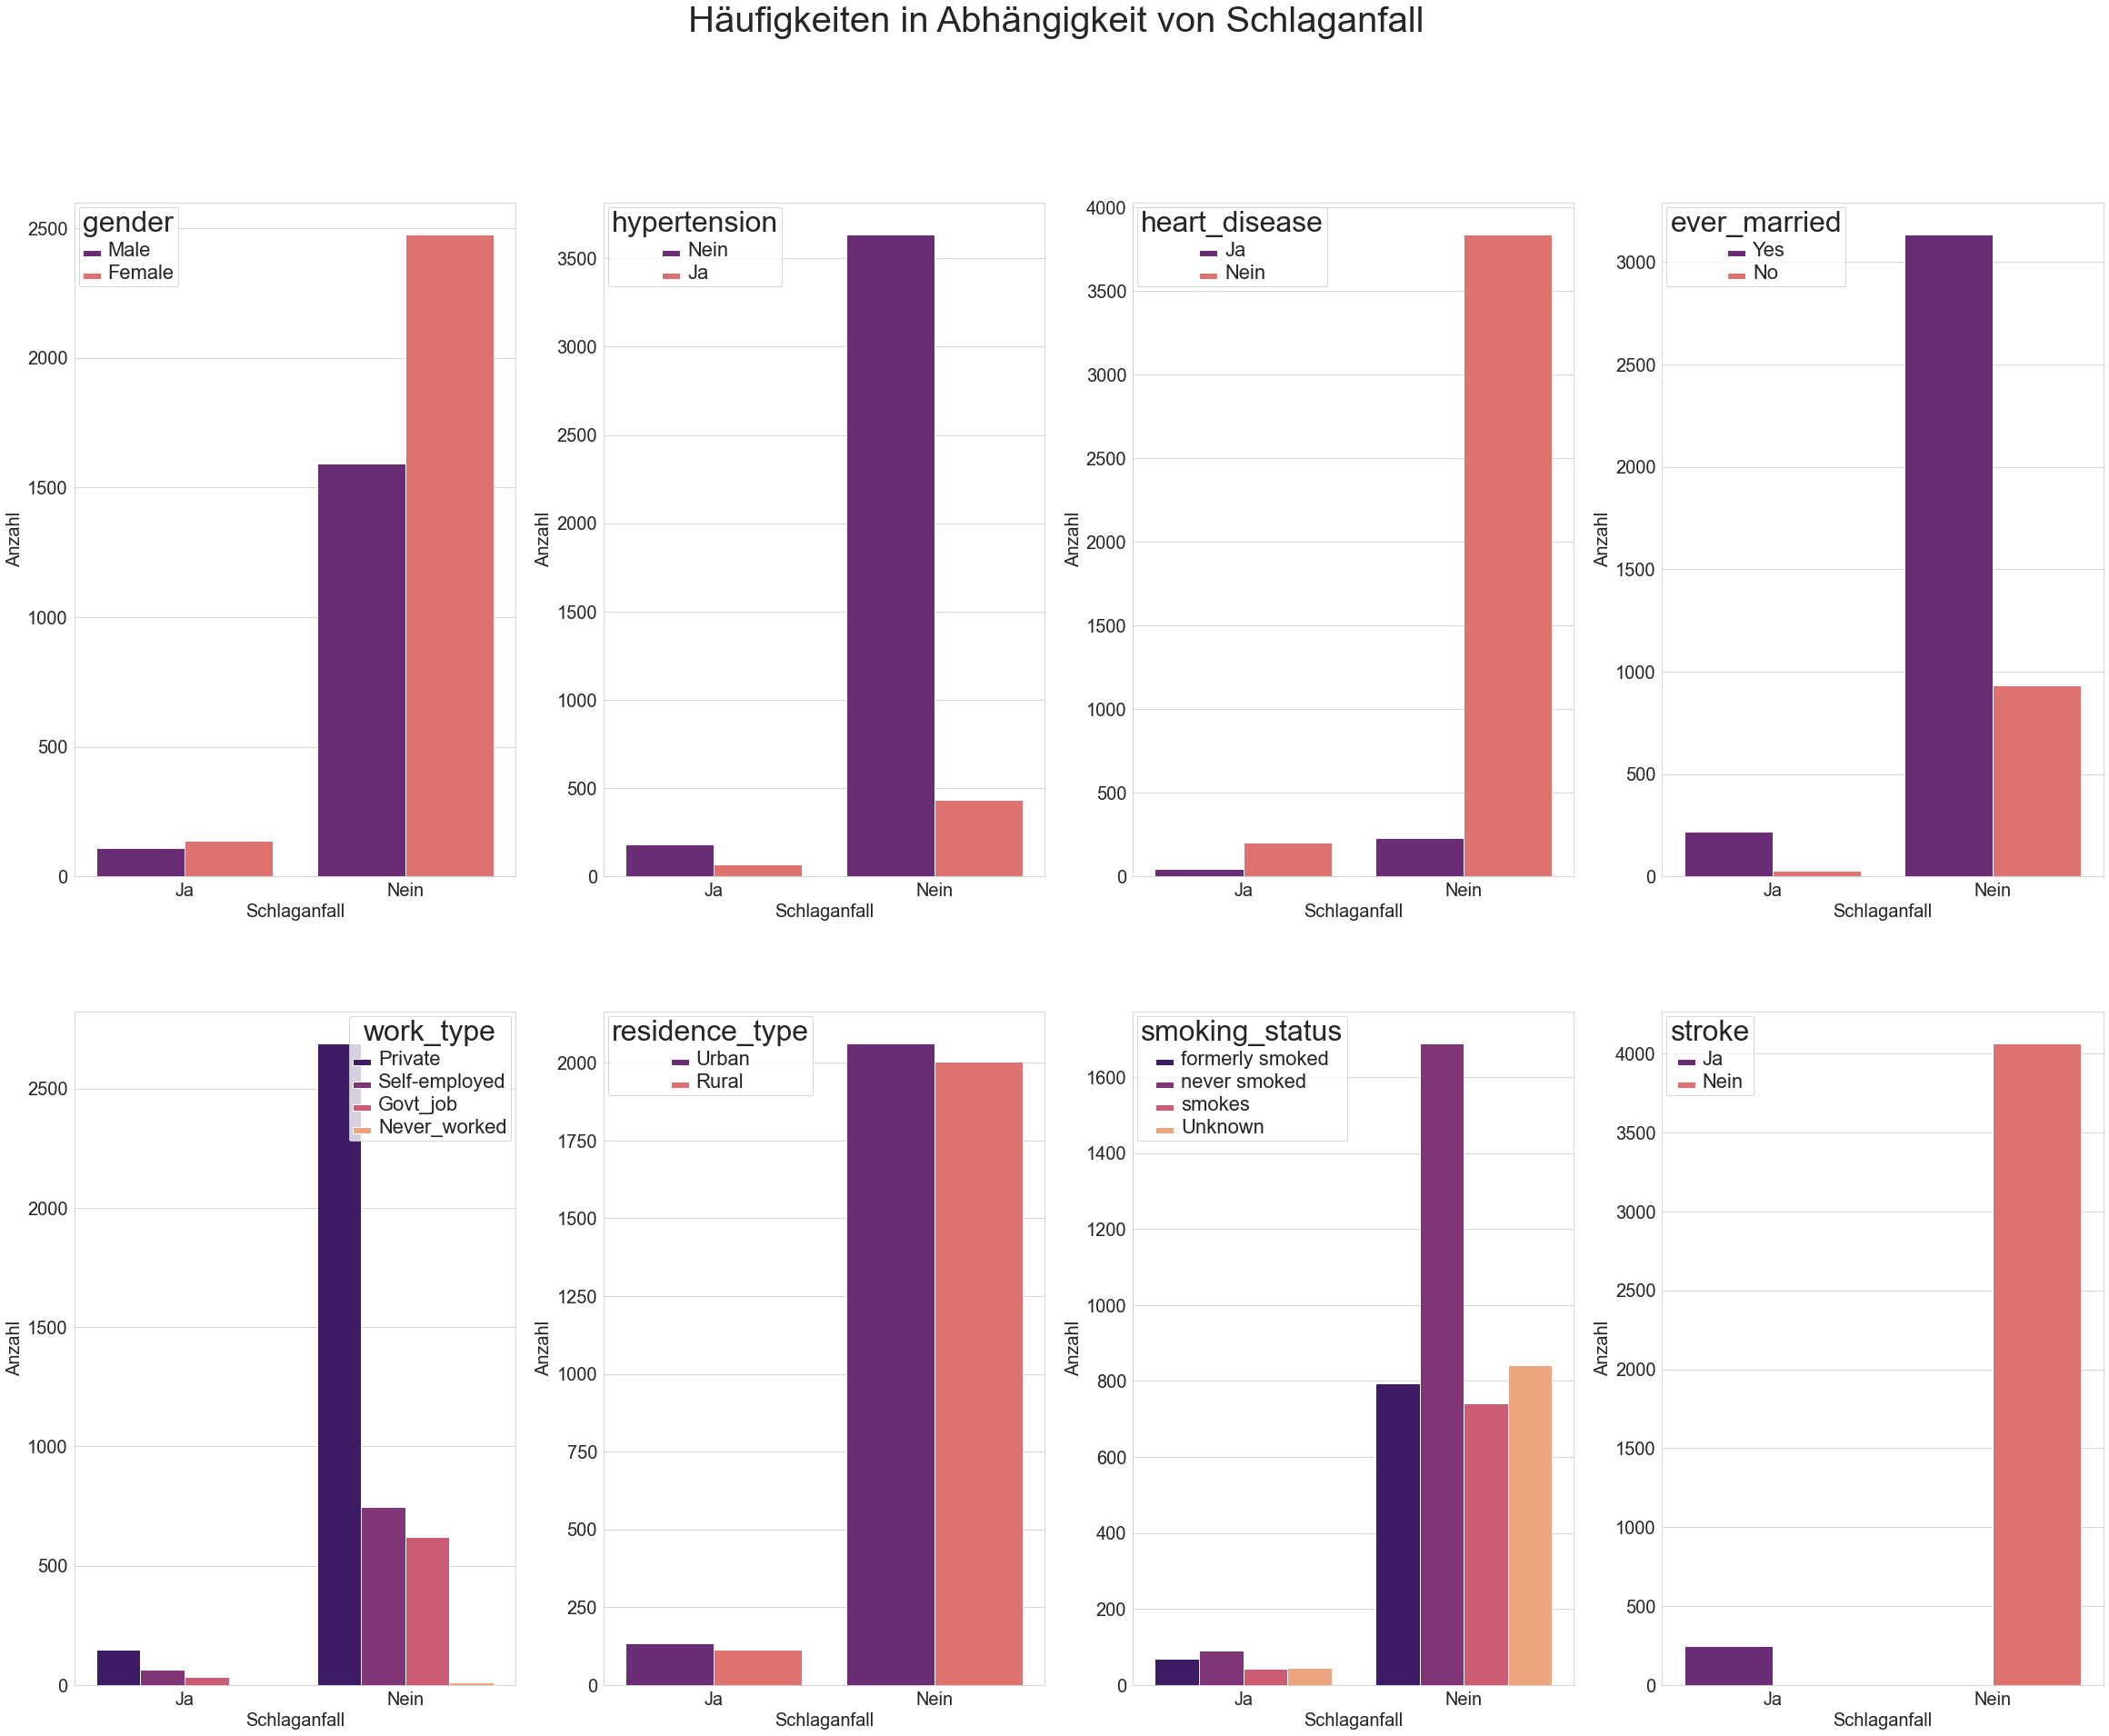

In [26]:
df_st=['gender','hypertension','heart_disease','ever_married','work_type','residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(2, 4, figsize=(40,30))
fig.suptitle("Häufigkeiten in Abhängigkeit von Schlaganfall",size=40)
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    g=sns.countplot(x=df1.stroke, data=df1, ax=axs[i],hue=df_st[i],palette='magma')
    g.set_xlabel("Schlaganfall",fontsize=20)
    g.set_ylabel("Anzahl",fontsize=20)
    g.tick_params(labelsize=20)
    plt.setp(g.get_legend().get_texts(), fontsize='22') # for legend text
    plt.setp(g.get_legend().get_title(), fontsize='32')

### Crosstables

In [27]:
pd.crosstab(df['ever_married'],df['stroke'])

stroke,0,1
ever_married,,
No,933,27
Yes,3133,220


In [28]:
pd.crosstab(df['smoking_status'],df['stroke'])

stroke,0,1
smoking_status,,
Unknown,842,45
formerly smoked,793,70
never smoked,1689,90
smokes,742,42


In [29]:
pd.crosstab(df['work_type'],df['stroke'])

stroke,0,1
work_type,,
Govt_job,621,33
Never_worked,10,0
Private,2690,149
Self-employed,745,65


### Histograms 

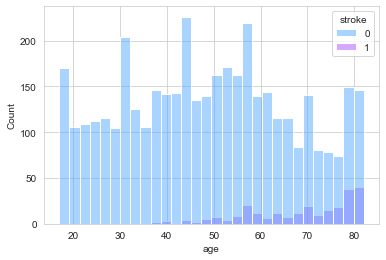

In [30]:
ax = sns.histplot(data=df,x='age', bins=30, hue='stroke', palette='cool')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

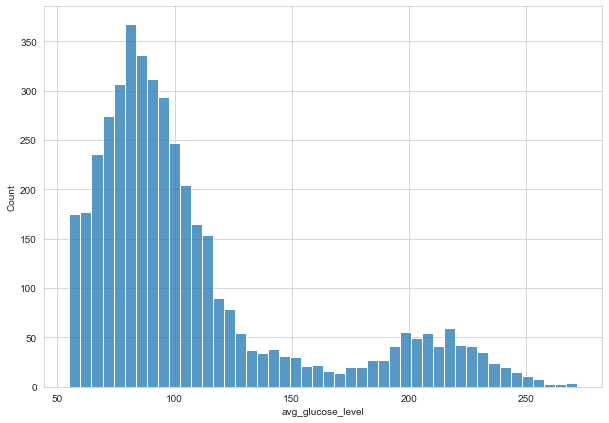

In [31]:
plt.figure(figsize=(10,7))
sns.histplot(df.avg_glucose_level)

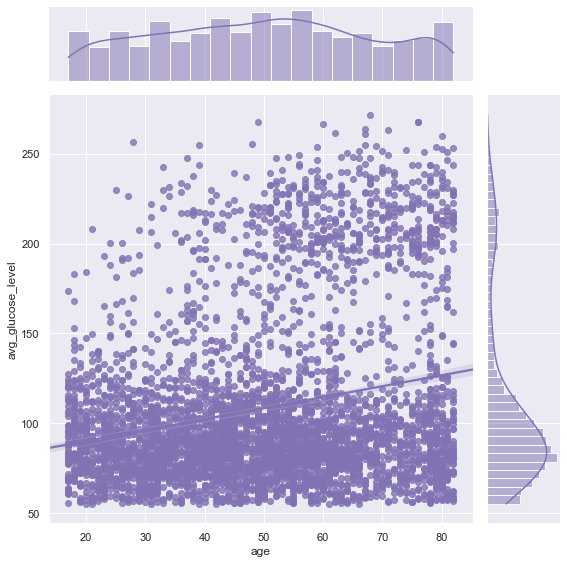

In [32]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="age", y="avg_glucose_level", data=df,kind="reg",  truncate=False,color="m", height=8)

### Boxplots

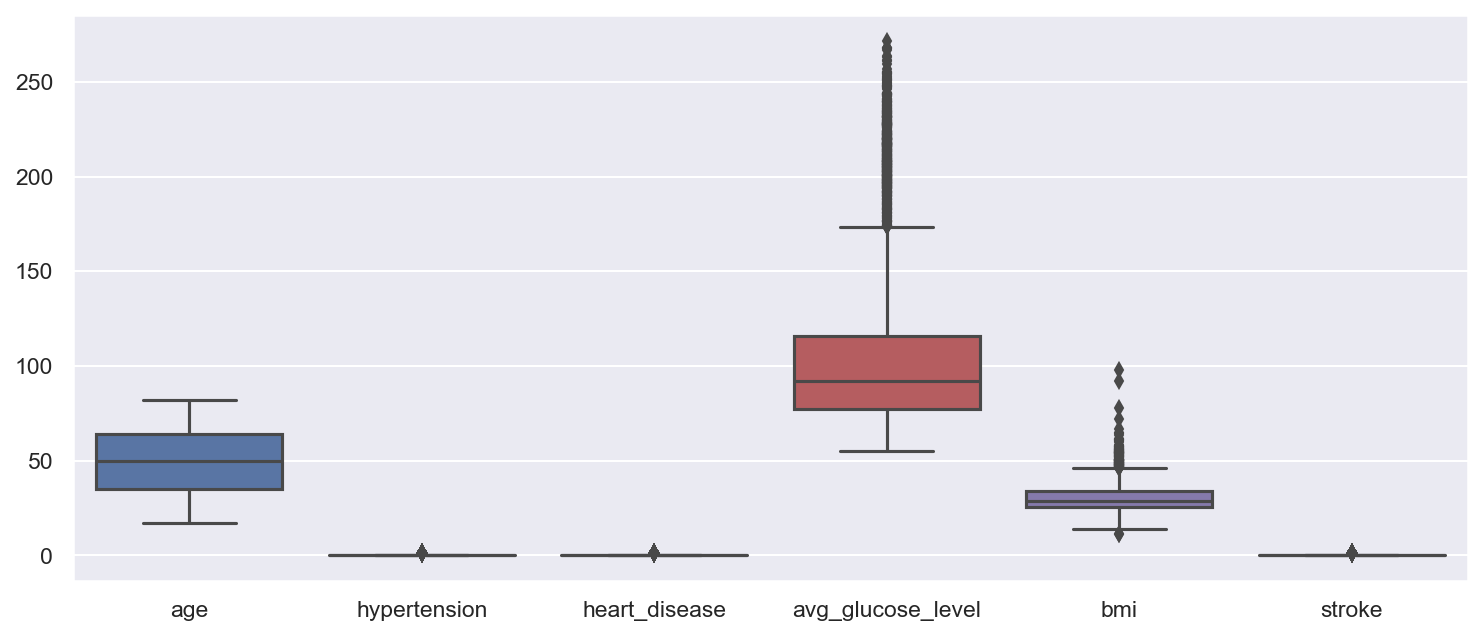

In [33]:
plt.figure(figsize=(12,5), dpi=150)
sns.boxplot(data=df)
plt.show()

### Scatterplots 

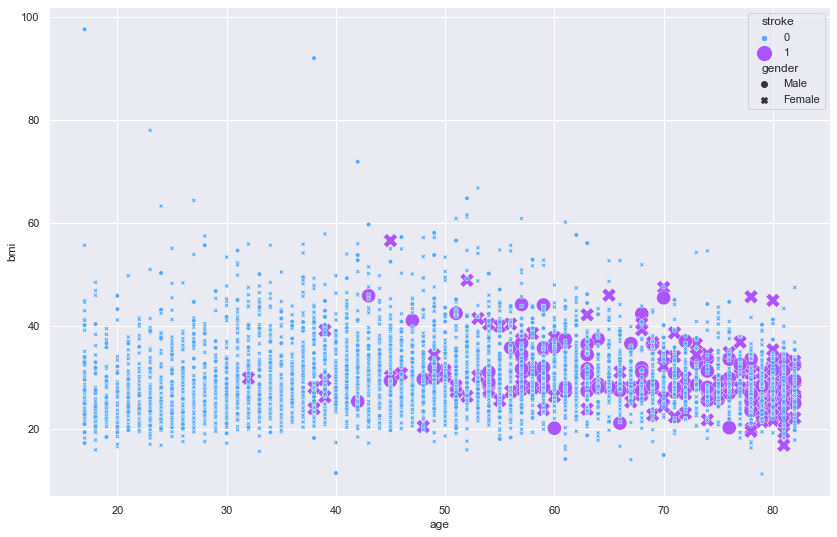

In [34]:
plt.figure(figsize=(14,9))

ax = sns.scatterplot(x = 'age' , y ='bmi', hue="stroke" , style ='gender', 
                     data = df, palette='cool',size="stroke",sizes=(200, 20))
plt.show()

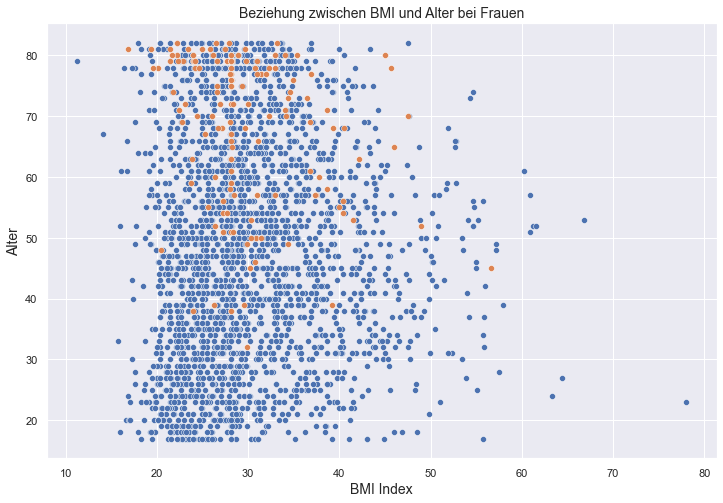

In [35]:

female=df.drop(df[df.gender =="Male"].index)  
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=1, data=female[female['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=1,  data=female[female['stroke'] == 1], ax=ax)
plt.title("Beziehung zwischen BMI und Alter bei Frauen",size=14)
plt.xlabel("BMI Index",fontsize=14)
plt.ylabel("Alter",fontsize=14)
plt.show()

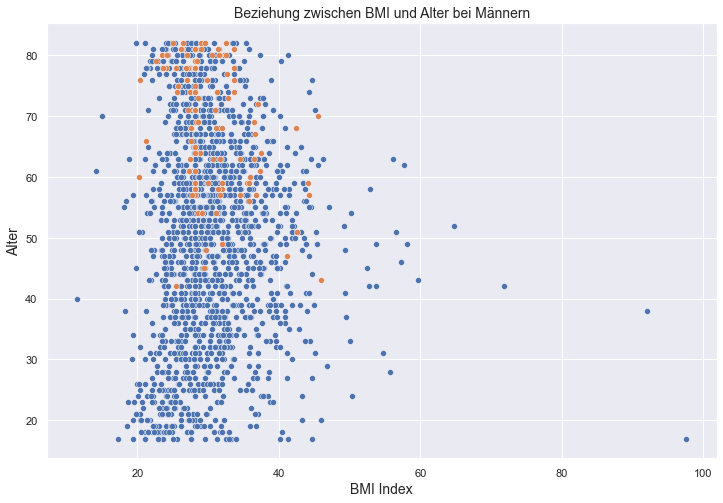

In [36]:
male=df.drop(df[df.gender =="Female"].index)  
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=1, data=male[male['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=1,  data=male[male['stroke'] == 1], ax=ax)
plt.title("Beziehung zwischen BMI und Alter bei Männern",size=14)
plt.xlabel("BMI Index",fontsize=14)
plt.ylabel("Alter",fontsize=14)
plt.show()

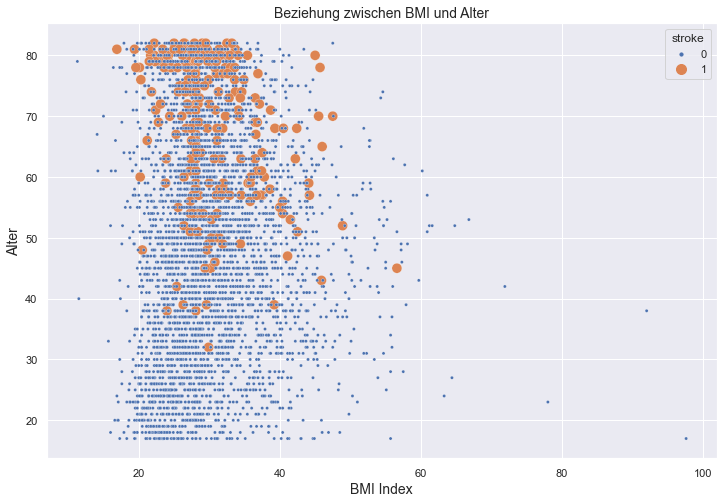

In [37]:
  plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=1, hue="stroke",  size="stroke",
    sizes=(100, 10), legend="full",data=df)
#sns.scatterplot(x="bmi", y="age", alpha=1,  data=df[df['stroke'] == 1], ax=ax)
plt.title("Beziehung zwischen BMI und Alter",size=14)
plt.xlabel("BMI Index",fontsize=14)
plt.ylabel("Alter",fontsize=14)

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


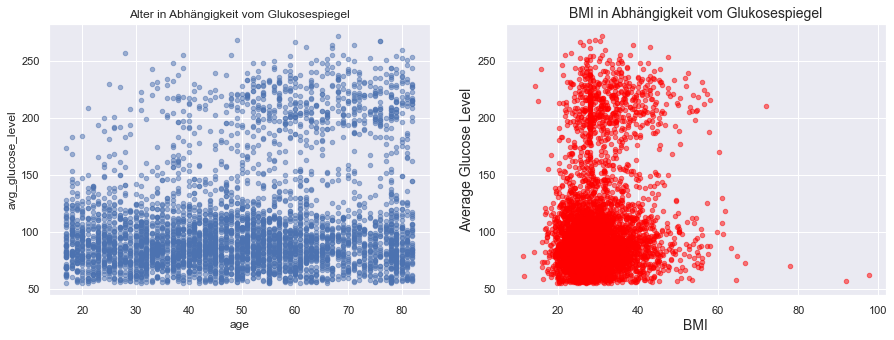

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5,  ax=axes[0], title="Alter in Abhängigkeit vom Glukosespiegel")
plt.ylabel("Average Glucose Level",size=14)
plt.xlabel("Alter", size= 14)
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="BMI in Abhängigkeit vom Glukosespiegel")
plt.ylabel("Average Glucose Level",size=14)
plt.xlabel("BMI", size= 14)
plt.title("BMI in Abhängigkeit vom Glukosespiegel",size=14)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


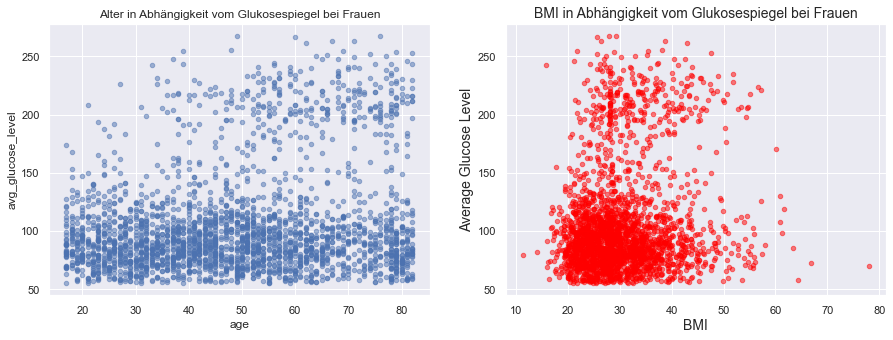

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
female.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5,  ax=axes[0], title="Alter in Abhängigkeit vom Glukosespiegel bei Frauen")
female.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1])
plt.ylabel("Average Glucose Level",size=14)
plt.xlabel("BMI", size= 14)
plt.title("BMI in Abhängigkeit vom Glukosespiegel bei Frauen",size=14)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


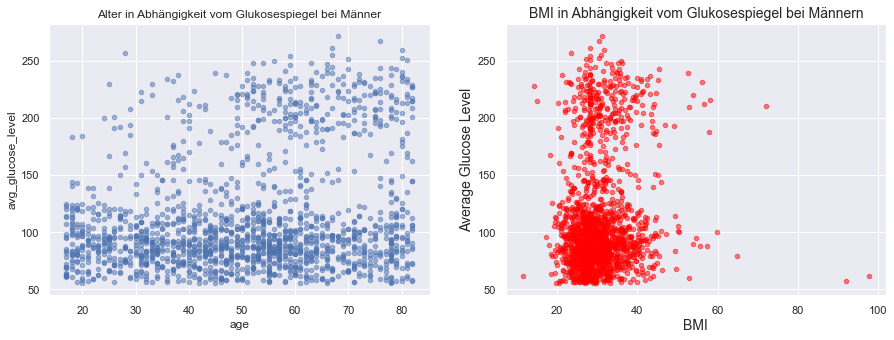

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
male.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5,  ax=axes[0], title="Alter in Abhängigkeit vom Glukosespiegel bei Männer")
male.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="BMI in Abhängigkeit vom Glukosespiegel bei Männern")
plt.ylabel("Average Glucose Level",size=14)
plt.xlabel("BMI", size= 14)
plt.title("BMI in Abhängigkeit vom Glukosespiegel bei Männern",size=14)
plt.show()

### Pairplot

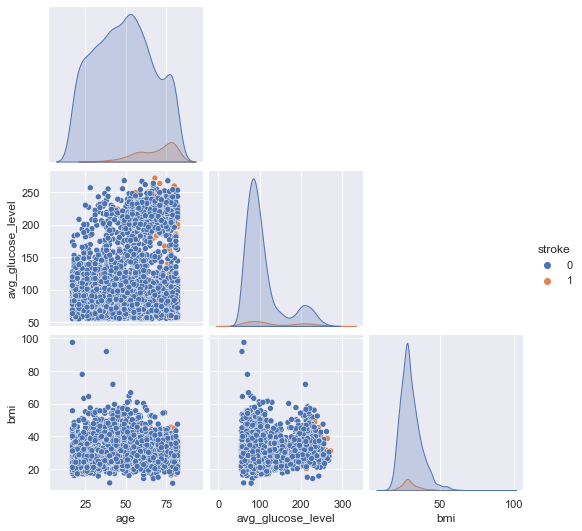

In [41]:
df_pplot = df[['age','avg_glucose_level','bmi',"stroke"]] 
sns.pairplot(df_pplot, hue="stroke",corner=True)

In [42]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000
mean,49.745885,0.115465,0.063761,108.226388,30.323209,0.057269
std,18.125129,0.319619,0.244355,47.568050,7.181441,0.232382
min,17.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,35.000000,0.000000,0.000000,77.450000,25.500000,0.000000
50%,50.000000,0.000000,0.000000,92.270000,28.800000,0.000000
75%,64.000000,0.000000,0.000000,115.920000,33.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Looking for Correlations

In [43]:
corr_matrix=df.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.251171
avg_glucose_level    0.128888
heart_disease        0.127633
hypertension         0.117027
bmi                 -0.007828
Name: stroke, dtype: float64

## Prepare the Data for Machine Learning Algorithms

### Data Cleaning

In [44]:
#Imputation transformer for completing missing values.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [45]:
df_num = df.drop(columns=["work_type","residence_type","smoking_status","gender","ever_married"]) 
#imputer.fit(df_num)
#X = imputer.transform(df_num)

## Handling Text and Categorical Attributes

In [46]:

enc=LabelEncoder()

df["work_type"]=enc.fit_transform(df['work_type'])
df["ever_married"]=enc.fit_transform(df['ever_married'])
df["residence_type"]=enc.fit_transform(df['residence_type'])
df["smoking_status"]=enc.fit_transform(df['smoking_status'])
df["gender"]=enc.fit_transform(df['gender'])


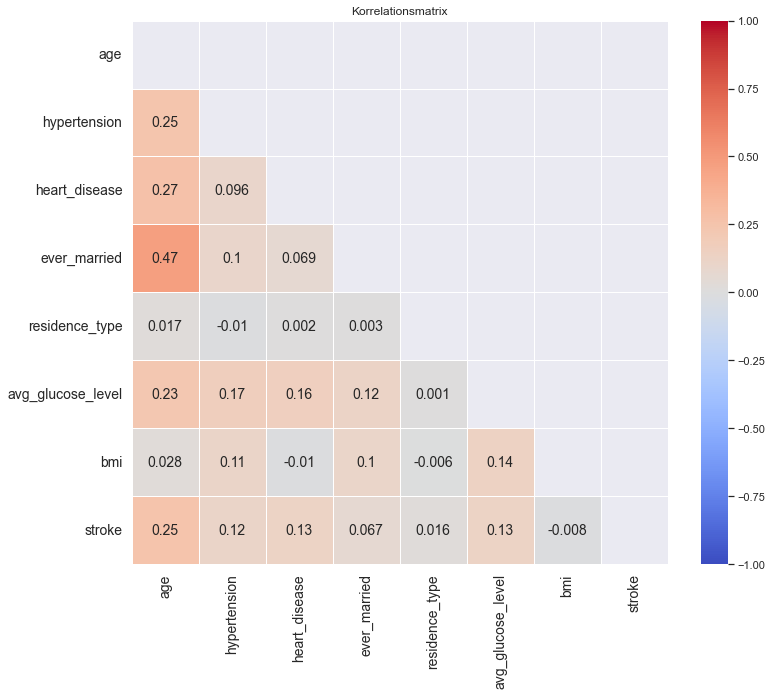

In [47]:
df_plot = df[['age','hypertension','heart_disease',"ever_married","residence_type","avg_glucose_level","bmi","stroke"]] 

plt.figure(figsize=(12,10))
upp_mat = np.triu(df_plot.corr())

sns.heatmap(round(df_plot.corr(), 3),annot=True, annot_kws={"size":14}, vmin=-1,
            vmax = +1, linewidths=0.5,cmap="coolwarm",mask = upp_mat)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Korrelationsmatrix")
plt.show()

Erstellung von Dummy Variablen für Kategorische Werte

In [48]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Select and Train A Model

In [49]:
X=df.drop(columns=["stroke"])
y = df.iloc[:,10]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4313, dtype: int64

In [50]:
XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [51]:
len(YTest)

1294

### Feature Scaling

In [52]:
scaler = StandardScaler()
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.fit_transform(XTest)

#### PCA

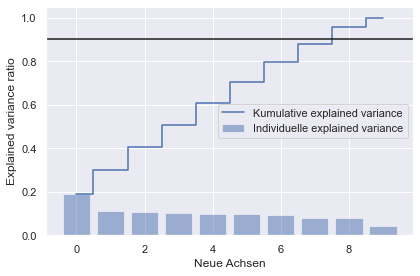

In [53]:
pca = PCA(n_components=10)
X_new = pca.fit_transform(XTrain)
exp_var=pca.explained_variance_ratio_
cum_exp_var=np.cumsum(exp_var)
plt.bar(range(0, len(exp_var)), exp_var, alpha=0.5, align='center', label='Individuelle explained variance')
plt.step(range(0, len(cum_exp_var)), cum_exp_var, where='mid', label='Kumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Neue Achsen')
plt.legend(loc='best')
plt.tight_layout()
plt.axhline(y=0.90, color='k', linestyle='-')  ##zeigt an, dass für 95% 8 Komponente

plt.show()


In [54]:
print(pca.explained_variance_ratio_)

#print(abs( pca.components_ ))

[0.19043198 0.1116529  0.10567796 0.10097307 0.09942223 0.09655861
 0.09112088 0.08102309 0.07871348 0.04442581]


### Training and Evaluation on the Training Set

#### SVM

In [55]:
from sklearn.svm import SVC
svc = SVC(class_weight="balanced",random_state=42)
svc.fit(XTrain, YTrain)
trainscore_svc=svc.score(XTrain,YTrain)
#Test accuracy
y_pred = svc.predict(XTest)
acc0 = accuracy_score(YTest, y_pred)
print(confusion_matrix(YTest, y_pred))
print(classification_report(YTest, y_pred))

print(f"SVC: \n Trainingsmenge Acc: {round(trainscore_svc,3)}, Testmenge Acc ist {round(acc0,3)} mit einem Recall von {round(recall_score(YTest, y_pred),3)} und Precision von {round(precision_score(YTest, y_pred),3)}") 


[[943 277]
 [ 30  44]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1220
           1       0.14      0.59      0.22        74

    accuracy                           0.76      1294
   macro avg       0.55      0.68      0.54      1294
weighted avg       0.92      0.76      0.82      1294

SVC: 
 Trainingsmenge Acc: 0.79, Testmenge Acc ist 0.763 mit einem Recall von 0.595 und Precision von 0.137


#### Decision Tree

In [56]:
# Decision Tree

classifier = DecisionTreeClassifier(class_weight="balanced",random_state=42)
classifier.fit(XTrain, YTrain)
trainscore_class=classifier.score(XTrain,YTrain)
#Test accuracy
y_pred = classifier.predict(XTest)
acc = accuracy_score(YTest, y_pred)

In [57]:

print(confusion_matrix(YTest, y_pred))
print(classification_report(YTest, y_pred))

print(f"DecisionTree: \n Trainingsmenge Acc: {round(trainscore_class,3)}, Testmenge Acc ist {round(acc,3)} mit einem Recall von {round(recall_score(YTest, y_pred),3)} und Precision von {round(precision_score(YTest, y_pred),3)}") 


[[1169   51]
 [  61   13]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1220
           1       0.20      0.18      0.19        74

    accuracy                           0.91      1294
   macro avg       0.58      0.57      0.57      1294
weighted avg       0.91      0.91      0.91      1294

DecisionTree: 
 Trainingsmenge Acc: 1.0, Testmenge Acc ist 0.913 mit einem Recall von 0.176 und Precision von 0.203


##### Mit PCA

In [58]:
#mit PCA
XTrain_pca = pca.fit_transform(XTrain)
XTest_pca = pca.fit_transform(XTest)
classifier.fit(XTrain_pca, YTrain)
trainscore_class=classifier.score(XTrain_pca,YTrain)
#Test accuracy
y_pred = classifier.predict(XTest_pca)
acc25 = accuracy_score(YTest, y_pred)
print(confusion_matrix(YTest, y_pred))
print(classification_report(YTest, y_pred))
print(f"DecisionTree mit PCA: \n Trainingsmenge Acc: {round(trainscore_class,3)}, Testmenge Acc ist {round(acc25,3)} mit einem Recall von {round(recall_score(YTest, y_pred),3)} und Precision von {round(precision_score(YTest, y_pred),3)}") 


[[1112  108]
 [  65    9]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1220
           1       0.08      0.12      0.09        74

    accuracy                           0.87      1294
   macro avg       0.51      0.52      0.51      1294
weighted avg       0.90      0.87      0.88      1294

DecisionTree mit PCA: 
 Trainingsmenge Acc: 1.0, Testmenge Acc ist 0.866 mit einem Recall von 0.122 und Precision von 0.077


#### KNN

In [59]:
neigh = KNeighborsClassifier()
neigh.fit(XTrain, YTrain)
trainscore_knn=neigh.score(XTrain,YTrain)
y_pred = neigh.predict(XTest)
acc3 = accuracy_score(YTest, y_pred)
print(confusion_matrix(YTest, y_pred))
print(classification_report(YTest, y_pred))
print(f"KNN : \n Trainingsmenge Acc: {round(trainscore_knn,3)}, Testmenge Acc ist {round(acc3,3)} mit einem Recall von {round(recall_score(YTest, y_pred),3)} und Precision von {round(precision_score(YTest, y_pred),3)}") 


[[1212    8]
 [  72    2]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1220
           1       0.20      0.03      0.05        74

    accuracy                           0.94      1294
   macro avg       0.57      0.51      0.51      1294
weighted avg       0.90      0.94      0.92      1294

KNN : 
 Trainingsmenge Acc: 0.944, Testmenge Acc ist 0.938 mit einem Recall von 0.027 und Precision von 0.2


#### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
randclass = RandomForestClassifier(n_estimators=100, random_state=42)
randclass.fit(XTrain, YTrain)
trainscore_forest=randclass.score(XTrain,YTrain)
y_pred = randclass.predict(XTest)
acc5 = accuracy_score(YTest, y_pred)
print(confusion_matrix(YTest,y_pred))
print(classification_report(YTest, y_pred))
print(f"Random Forest : \n Trainingsmenge Acc: {round(trainscore_forest,3)}, Testmenge Acc  ist {round(acc5,3)} mit einem Recall von {round(recall_score(YTest, y_pred),3)} und Precision von {round(precision_score(YTest, y_pred),3)}") 


[[1220    0]
 [  74    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1220
           1       0.00      0.00      0.00        74

    accuracy                           0.94      1294
   macro avg       0.47      0.50      0.49      1294
weighted avg       0.89      0.94      0.92      1294

Random Forest : 
 Trainingsmenge Acc: 1.0, Testmenge Acc  ist 0.943 mit einem Recall von 0.0 und Precision von 0.0


### Correction of Unbalanced dataset

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier()
gradientboost.fit(XTrain,YTrain)
y_pred = gradientboost.predict(XTest)
acc5 = accuracy_score(YTest, y_pred)
print(f"Die Testmenge Accuracy von Gradientboost ist {round(acc5,3)} mit einem Recall von {round(recall_score(YTest, y_pred),3)} und Precision von {round(precision_score(YTest, y_pred),3)}") 


Die Testmenge Accuracy von Gradientboost ist 0.941 mit einem Recall von 0.027 und Precision von 0.333


In [62]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(XTrain,YTrain)
y_pred = ada.predict(XTest)
acc5 = accuracy_score(YTest, y_pred)
print(f"Die Testmenge Accuracy von Adaboost ist {round(acc5,3)} mit einem Recall von {round(recall_score(YTest, y_pred),3)} und Precision von {round(precision_score(YTest, y_pred),3)}") 


Die Testmenge Accuracy von Adaboost ist 0.943 mit einem Recall von 0.014 und Precision von 0.5


Leider haben beide Classifier keine Auswirkungen auf den Recall-Score. Die ungleichverteilten Daten werden wir mit SMoTE beseitigen. SMOTE (synthetic minority oversampling technique) ist einer der Methoden, die am häufigsten für imbalance Problemen verwendet wird. 

In [63]:
sm = SMOTE(random_state=42)
XTrain_sm, YTrain_sm = sm.fit_resample(XTrain,YTrain)
YTrain_sm.value_counts()

0    2846
1    2846
Name: stroke, dtype: int64

In [64]:
models = []
models.append(['SVM',SVC(class_weight="balanced",random_state=42)])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=42,class_weight="balanced")])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['MLPClassifier',MLPClassifier()])
models.append(['RandomForest',RandomForestClassifier(criterion= 'entropy', max_depth= 20, max_features= 'auto', min_samples_split= 10, n_estimators= 100 )])
models.append(['GradientBoostingClassifier',GradientBoostingClassifier()])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(XTrain_sm,YTrain_sm)
    acc_train=model.score(XTrain_sm,YTrain_sm)
    y_pred = model.predict(XTest)
    cm = confusion_matrix(YTest,y_pred)
    accuracies = accuracy_score(YTest, y_pred)
    
    precision = precision_score(YTest,y_pred)
    recall = recall_score(YTest,y_pred)
    print(models[m][0],':')
    print(cm)
    print(f"Trainingsmenge accuracy_score: {acc_train}")
    print('Testmenge Accuracy Score: ',accuracy_score(YTest,y_pred))
   
    print('Precision: {:.2f} %'.format(precision))
    print('Recall: {:.2f} %'.format(recall))
    print(" ")
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(YTest,y_pred)*100)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_1.append(lst_2)

SVM :
[[968 252]
 [ 40  34]]
Trainingsmenge accuracy_score: 0.8569922698524245
Testmenge Accuracy Score:  0.7743431221020093
Precision: 0.12 %
Recall: 0.46 %
 
DecisionTree :
[[936 284]
 [ 40  34]]
Trainingsmenge accuracy_score: 1.0
Testmenge Accuracy Score:  0.749613601236476
Precision: 0.11 %
Recall: 0.46 %
 
KNeigbors :
[[1007  213]
 [  50   24]]
Trainingsmenge accuracy_score: 0.9335910049191848
Testmenge Accuracy Score:  0.7967542503863988
Precision: 0.10 %
Recall: 0.32 %
 
MLPClassifier :
[[1047  173]
 [  54   20]]
Trainingsmenge accuracy_score: 0.9234012649332396
Testmenge Accuracy Score:  0.8245749613601236
Precision: 0.10 %
Recall: 0.27 %
 
RandomForest :
[[826 394]
 [ 20  54]]
Trainingsmenge accuracy_score: 0.9912157413914265
Testmenge Accuracy Score:  0.6800618238021638
Precision: 0.12 %
Recall: 0.73 %
 
GradientBoostingClassifier :
[[223 997]
 [  3  71]]
Trainingsmenge accuracy_score: 0.9170765987350668
Testmenge Accuracy Score:  0.22720247295208656
Precision: 0.07 %
Recall:

### Better Evaluation using Cross-Validation

In [65]:
all_model = [SVC(class_weight="balanced",random_state=42) , 
             DecisionTreeClassifier(class_weight="balanced",random_state=42),
             KNeighborsClassifier(), MLPClassifier(),RandomForestClassifier(n_estimators=100,random_state=42) ]
accuracy=[]
recall = []
precision = []

for model in all_model:
    cv = cross_val_score(model, XTrain_sm, YTrain_sm, scoring='accuracy', cv=5).mean()
    accuracy.append(cv)
    
    cv = cross_val_score(model, XTrain_sm, YTrain_sm, scoring='recall', cv=5).mean()
    recall.append(cv)
    
    cv = cross_val_score(model, XTrain_sm, YTrain_sm, scoring='precision', cv=5).mean()
    precision.append(cv)

model = ['SVC',  'DecisionTreeClassifier','KNeighborsClassifier',
         'MLPClassifier',"RandomForestClassifier"]

score = pd.DataFrame({'Model': model, "Accuracy":accuracy,'Precision': precision, 'Recall': recall})
score.style.background_gradient(high=1,axis=0)

,Model,Accuracy,Precision,Recall
0,SVC,0.842585,0.801831,0.910047
1,DecisionTreeClassifier,0.895647,0.881368,0.913901
2,KNeighborsClassifier,0.893711,0.829940,0.990513
3,MLPClassifier,0.893184,0.847649,0.951506
4,RandomForestClassifier,0.951163,0.942627,0.960988


In [66]:
# Mögliche SMOTE Pipeline 
# Aufgrund von Zeitgründen 
# Verbesserung der Score- Werte Möglich

## Fine-Tune Model

### GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV


In [68]:
grid_model = [(RandomForestClassifier(),[{'criterion':['gini','entropy']}])]

parameter_2 = {'n_estimators':[100,150,200],
                'max_depth':(5,10,20,30,50),
              'criterion':('gini','entropy'),
              'max_features':('auto','sqrt', 'log2'),
              'min_samples_split':(10, 20,40,50,100)
              }
base_tree2 = RandomForestClassifier(class_weight="balanced",
                                   random_state=42)

grid_Search_tree = GridSearchCV(estimator=base_tree2,
                           param_grid=parameter_2,
                            scoring='precision' ,
                            cv=5,
                            n_jobs=-1) # scoring metrics

grid_Search_tree = grid_Search_tree.fit(XTrain_sm, YTrain_sm)

print(f"Precision Score für RandomForest: {grid_Search_tree.best_score_}")
print(f"Beste Parameter:\n {grid_Search_tree.best_params_}")
#acc 0.944
#recall 0.955
#precision 0.936


Precision Score für RandomForest: 0.939650228708549
Beste Parameter:
 {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 100}


In [69]:
grid_Search_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 100}

In [70]:
grid_Search_tree.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, min_samples_split=10, random_state=42)

In [71]:
pd.DataFrame(grid_Search_tree.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.395888,0.019554,0.023005,0.001673,gini,5,auto,10,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.764890,0.775785,0.765926,0.762611,0.758190,0.765481,0.005798,418
1,0.586531,0.027044,0.031207,0.002316,gini,5,auto,10,150,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.765723,0.777778,0.760417,0.759232,0.754658,0.763562,0.007933,445
2,0.840788,0.050988,0.046010,0.006724,gini,5,auto,10,200,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.770701,0.784522,0.765321,0.766021,0.755832,0.768479,0.009362,373
3,0.388887,0.025481,0.029406,0.014843,gini,5,auto,20,100,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.763323,0.777280,0.770030,0.767511,0.758621,0.767353,0.006296,388
4,0.617338,0.016095,0.034408,0.002245,gini,5,auto,20,150,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.759055,0.777108,0.763040,0.763314,0.758998,0.764303,0.006667,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1.105647,0.085573,0.037208,0.002926,entropy,50,log2,50,150,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.891993,0.881301,0.879675,0.886731,0.877451,0.883430,0.005265,175
446,1.512337,0.072971,0.051014,0.007773,entropy,50,log2,50,200,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.897579,0.875606,0.884176,0.887987,0.876020,0.884274,0.008174,166
447,0.684352,0.038497,0.024406,0.002059,entropy,50,log2,100,100,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.854610,0.857143,0.853035,0.863124,0.840722,0.853727,0.007353,280
448,0.986233,0.030292,0.031807,0.003060,entropy,50,log2,100,150,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.849023,0.857372,0.848967,0.856230,0.841762,0.850671,0.005671,304


## Evaluate your system on the test set

Text(0, -0.75, 'Final Performance for RandomForestTree')

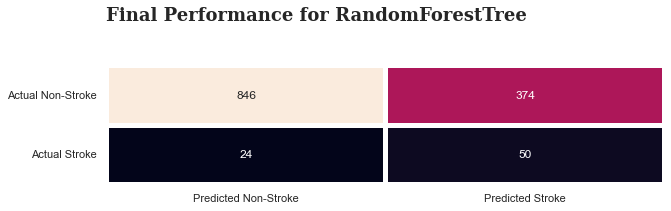

In [73]:
final = RandomForestClassifier(random_state=42,criterion= 'entropy', max_depth= 20, max_features= 'auto', min_samples_split= 10, n_estimators= 100)
final.fit(XTrain_sm, YTrain_sm)
y_pred = final.predict(XTest)
matrix  = confusion_matrix(YTest,y_pred)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,14)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, :])
ax0.set_facecolor(background_color)
sns.heatmap(matrix, annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
ax0.text(0,-0.75,'Final Performance for RandomForestTree',fontsize=18,fontweight='bold',fontfamily='serif')
